In [1]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 
from scipy.optimize import root

from mod.SimSale import SimSale
from mod.Demand import Demand
from numba import jit

from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [2]:
sim_sale=SimSale(level_size=[3,3],seed=1)
sale_df = sim_sale.generate_sale(lam=1000,size=100,un_ava_frac=0.3,un_ava_mix=True)
# sale_df
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df, goods_attr={'A': ['a', 'b','c'], 'B': ['a', 'b','c']})
sale_df

a    0.318605
b    0.591657
c    0.089738
Name: A, dtype: float64
a    0.231984
b    0.554702
c    0.213314
Name: B, dtype: float64
          a         b         c
a  1.000000  0.280648  0.380994
b  0.744932  1.000000  0.494634
c  0.024803  0.678162  1.000000
          a         b         c
a  1.000000  0.120638  0.362802
b  0.183110  1.000000  0.675328
c  0.252368  0.436672  1.000000


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,NaN,195.0,61.0,NaN,307.0,139.0,123.0,54.0,NaN
0,65.0,428.0,NaN,160.0,NaN,130.0,NaN,40.0,24.0
0,NaN,415.0,157.0,139.0,NaN,NaN,43.0,53.0,15.0
0,NaN,195.0,NaN,145.0,347.0,128.0,48.0,NaN,25.0
0,190.0,NaN,276.0,NaN,335.0,NaN,20.0,53.0,21.0
...,...,...,...,...,...,...,...,...,...
0,68.0,225.0,NaN,135.0,353.0,135.0,NaN,47.0,NaN
0,55.0,NaN,296.0,146.0,333.0,NaN,NaN,53.0,25.0
0,83.0,462.0,162.0,130.0,NaN,NaN,26.0,NaN,66.0
0,63.0,473.0,NaN,134.0,NaN,118.0,21.0,NaN,51.0


## 2.参数估计

In [3]:
# method='dual_annealing'
mod.fit(method='dual_annealing')
print(mod.theta_hat)
# mod.validation(sim_sale,interval=0.1)
mod.init_theta(mod.theta_hat.x,to_goods=False)

     fun: 132876.37719560254
 message: ['Maximum number of iteration reached']
    nfev: 77459
    nhev: 0
     nit: 1000
    njev: 2182
  status: 0
 success: True
       x: array([ 0.34414625,  0.93872125, -0.916588  ,  0.04499964,  0.92494705,
       -0.03456402, -0.98186964, -0.6897142 , -0.11703144,  0.9360645 ,
       -1.27149871,  0.64301708, -1.699833  , -0.6899289 ,  0.64295596,
       -1.85336038, -1.9653464 , -0.68971419])


([array([0.32302805, 0.585411  , 0.09156095]),
  array([0.23071818, 0.55620914, 0.21307268])],
 [array([0.27252096, 0.33409665, 0.47077549, 0.71830402, 0.21900081,
         0.65543516]),
  array([0.15448708, 0.33404889, 0.65542135, 0.13547883, 0.12288961,
         0.33409666])])

0.9585977609054074

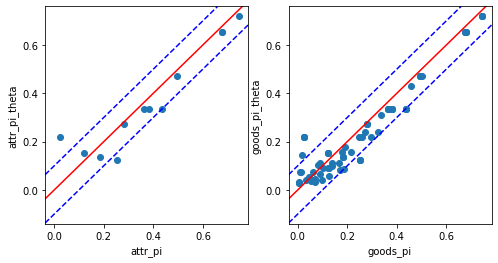

In [4]:
mod.score(SimSale=sim_sale,plot=True)

In [5]:
m1 = Demand(data=sale_df, goods_attr={'A': ['a', 'b','c'], 'B': ['a', 'b','c']},reparam=False)
m1.fit()

     fun: 132873.10682664096
 message: ['Maximum number of iteration reached']
    nfev: 72044
    nhev: 0
     nit: 1000
    njev: 1897
  status: 0
 success: True
       x: array([0.37828291, 0.69108979, 0.10692806, 0.38032486, 0.91871282,
       0.35175372, 0.27882383, 0.37279918, 0.47755037, 0.72185883,
       0.24710043, 0.66191954, 0.2114176 , 0.34444368, 0.66155657,
       0.11170493, 0.0743404 , 0.37284711])

In [6]:
m2 = Demand(data=sale_df, goods_attr={'A': ['a', 'b','c'], 'B': ['a', 'b','c']},reparam=True)
m2.fit()

     fun: 132878.90611269273
 message: ['Maximum number of iteration reached']
    nfev: 84033
    nhev: 0
     nit: 1000
    njev: 2528
  status: 0
 success: True
       x: array([ 0.3369478 ,  0.92880242, -0.92265637, -0.49448539,  0.38456332,
       -0.57466857, -1.00270428, -0.74706362, -0.1205815 ,  0.92794657,
       -1.31997625,  0.64411023, -2.70023295, -0.74724757,  0.64410287,
       -1.341872  , -2.88591866, -0.74706356])

0.9441196009309858

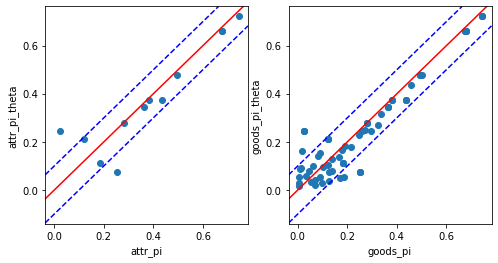

In [7]:
m1.score(sim_sale,plot=True)

0.9454797775409153

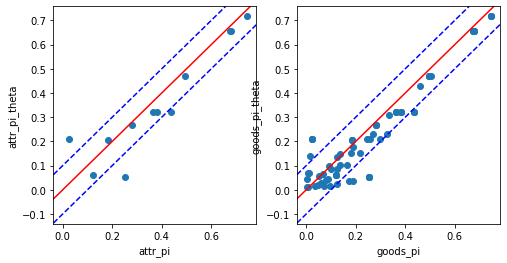

In [8]:
m2.score(sim_sale,plot=True)

0.8792280831441668

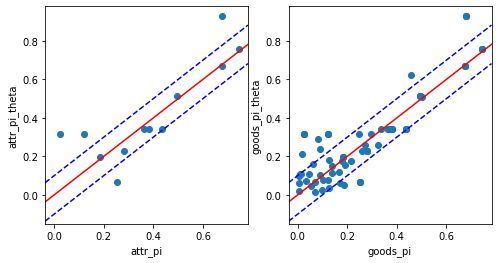

In [21]:
m = Demand(data=sale_df, goods_attr={'A': ['a', 'b','c'], 'B': ['a', 'b','c']},reparam=False)
m.fit(method='dual_annealing')
m.score(sim_sale,plot=True)

In [6]:
m.score(sim_sale)

0.7754661375256833

In [11]:
np.on

[          a         b         c
 a  1.000000  0.308713  0.419093
 b  0.819426  1.000000  0.544098
 c  0.027284  0.745978  1.000000,
           a         b         c
 a  1.000000  0.132701  0.399082
 b  0.201421  1.000000  0.742861
 c  0.277605  0.480339  1.000000]

In [23]:
sim_sale.attr_pi_list[0].to_numpy()[np.tril_indices(3,k=-1)]

array([0.81942557, 0.02728352, 0.74597798])

In [27]:
tt=sim_sale.attr_pi_list[0].to_numpy()[np.tril_indices_from(sim_sale.attr_pi_list[0].to_numpy())]
tt

array([1.        , 0.81942557, 1.        , 0.02728352, 0.74597798,
       1.        ])

In [41]:
mod.theta_hat['x'][:len(mod.attr_type_flatten)]

array([ 0.26972216,  0.88525082, -0.99668347, -0.49479229,  0.3835931 ,
       -0.57222145])

In [38]:
mod.theta_hat['x']

array([ 0.26972216,  0.88525082, -0.99668347, -0.49479229,  0.3835931 ,
       -0.57222145, -1.17175688, -0.21181671,  0.13236196,  1.42599408,
       -2.11265591,  1.0625537 , -1.95208822, -0.21181671,  1.06254409,
       -1.78146839, -2.11566626,  0.11561679])

In [15]:
x_attr_pi_theta = np.array([])
for attr_pi in sim_sale.attr_pi_list:
    attr_pi         = attr_pi.to_numpy()
    attr_pi_triu    = attr_pi[np.triu_indices_from(attr_pi,k=1)]
    attr_pi_tril    = attr_pi[np.tril_indices_from(attr_pi,k=-1)]
    x_attr_pi_theta = np.append(x_attr_pi_theta,attr_pi_triu)
    x_attr_pi_theta = np.append(x_attr_pi_theta,attr_pi_tril)
y_attr_pi_theta_hat = np.array(mod.theta_hat_attr_pi).flatten()

In [16]:
x_attr_pi_theta

array([0.30871314, 0.41909318, 0.54409775, 0.81942557, 0.02728352,
       0.74597798, 0.13270128, 0.39908186, 0.74286103, 0.20142069,
       0.27760467, 0.48033906])

In [16]:
h = Jacobian(fun=mod.get_loglikelihood)
t = h(mod.theta_hat['x'])

In [24]:
from scipy.optimize import minimize
m = minimize(fun=mod.get_loglikelihood,x0=mod.theta_hat.x,method='L-BFGS-B')

In [4]:
mod.init_theta(mod.theta_hat.x,to_goods=False,reparam=False)

([[0.34080176836143106, 0.6361821717266645, 0.09990435377899741],
  [0.30372936071590684, 0.7297918554230398, 0.2792784458691151]],
 [[0.2555581274181589,
   0.36680115888663534,
   0.47460906243182577,
   0.749405412300485,
   0.012755029061774606,
   0.7567828933753964],
  [0.2286725397182332,
   0.30200098632066164,
   0.6965992325720258,
   0.10376124605132396,
   0.059348060729832,
   0.47460905500145095]])